In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define base directory (update this path if needed)
BASE_DIR = r"C:\dev\esiee\E5FI\ai_image\image_classifier\archive"  # Adjust to your actual path

# Define dataset paths
train_dir = os.path.join(BASE_DIR, "seg_train", "seg_train")
test_dir = os.path.join(BASE_DIR, "seg_test", "seg_test")
predict_dir = os.path.join(BASE_DIR, "seg_pred")  # For unseen predictions

# Print paths to verify correctness
print("Train Directory:", train_dir)
print("Test Directory:", test_dir)
print("Prediction Directory:", predict_dir)

Train Directory: C:\dev\esiee\E5FI\ai_image\image_classifier\archive\seg_train\seg_train
Test Directory: C:\dev\esiee\E5FI\ai_image\image_classifier\archive\seg_test\seg_test
Prediction Directory: C:\dev\esiee\E5FI\ai_image\image_classifier\archive\seg_pred


In [6]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation/testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Prediction generator (without labels)
predict_generator = test_datagen.flow_from_directory(
    predict_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,  # No labels for prediction
    shuffle=False
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [7]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation='softmax')  # 6 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator
)

Epoch 1/20


c:\Users\cleme\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 339s 760ms/step - accuracy: 0.4868 - loss: 1.3116 - val_accuracy: 0.6530 - val_loss: 0.9290
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 200s 451ms/step - accuracy: 0.6614 - loss: 0.8994 - val_accuracy: 0.7550 - val_loss: 0.6926
Epoch 3/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 202s 459ms/step - accuracy: 0.7122 - loss: 0.7880 - val_accuracy: 0.8107 - val_loss: 0.5407
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 174s 394ms/step - accuracy: 0.7480 - loss: 0.6816 - val_accuracy: 0.7620 - val_loss: 0.6438
Epoch 5/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 176s 398ms/step - accuracy: 0.7566 - loss: 0.6633 - val_accuracy: 0.8343 - val_loss: 0.4738
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 185s 420ms/step - accuracy: 0.7707 - loss: 0.6159 - val_accuracy: 0.8423 - val_loss: 0.4406
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 180s 409ms/step - accuracy: 0.7794 - loss: 0.5966 - val_accuracy: 0.8373 - val_loss: 0.4522
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 183s 415ms/step - accuracy: 0.7966 - loss: 0.57

In [9]:
model.save("image_classification_model.h5")

Testing Image: C:\dev\esiee\E5FI\ai_image\image_classifier\archive\seg_pred\seg_pred\5596.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


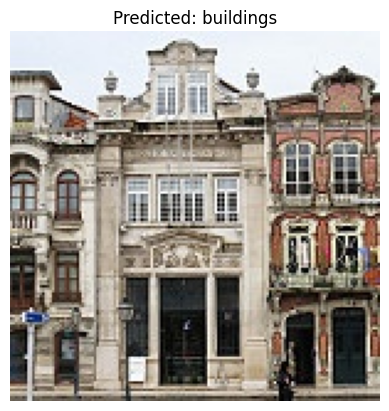

Predicted Class: buildings


In [102]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model("image_classification_model.h5")

# Class labels
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

def get_random_image(pred_dir):
    """Selects a random image from the prediction folder."""
    all_files = []
    for root, _, files in os.walk(pred_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                all_files.append(os.path.join(root, file))
    
    if not all_files:
        raise FileNotFoundError("No image files found in the prediction folder.")
    
    return random.choice(all_files)

def predict_random_image():
    """Loads a random image from seg_pred, makes a prediction, and displays it."""
    img_path = get_random_image(predict_dir)
    print(f"Testing Image: {img_path}")

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    predicted_class = classes[class_index]

    # Display the image with the predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis("off")
    plt.show()

    print(f"Predicted Class: {predicted_class}")

# Test with a random image
predict_random_image()

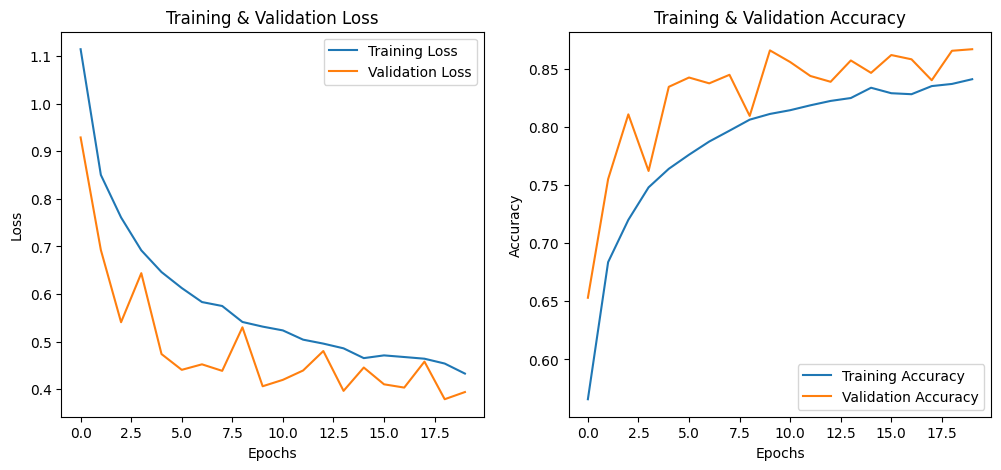

In [64]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()